<h1><center>Natural Computing, Experimenting with Genetic Programming</center></h1>
<center>Frederik Kelbel, s1653529</center>

## Set-up

I decided against seeding since the results could heavily depend on a good seed, depending on the parameters. It also has negative repurcussions on diversity, if the seed is kept the same during the evolution process. One could make the seed an inheritable trait/gene. The experiments do not cover this.

In [1]:
from Callables import find_prime_polynomial
from Chromosomes import Fitness, Poly_Chrom, Tree_Chrom
from Population import Poly_Population, Tree_Population
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_final_polynomials(pop, test_interval):
    print("Surviving polynomial: ")
    p = pop.polynomials[0]
    print(p.print_gp_polynomial())
    print("On test interval {0} the polynomial produced {1} primes. \nIt had a maximum of {2} "
          "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
          "\nIts fitness score is {5}.\n"
          .format(test_interval, p.num_primes_fitness_in_interval(test_interval),
                  p.num_consecutive_primes_fitness_in_interval(test_interval),
                  test_interval[0],
                  p.num_consecutive_primes_fitness(test_interval),
                  p.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                   Fitness.number_of_primes_in_interval,
                                                   Fitness.number_of_consecutive_primes])))

def show_average_fitness(pop, save_as):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(211)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Average Fitness')
    ax.plot(range(len(pop.average_fitness_over_time)), pop.average_fitness_over_time)
    fig.savefig(save_as)
    plt.show()
    
def show_average_fitness_comparison(pops, save_as):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(211)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Average Fitness')
    for pop in pops:
        ax.plot(range(len(pop.average_fitness_over_time)), pop.average_fitness_over_time, label=str(type(pop).__name__))
    ax.legend(loc='best')
    fig.savefig(save_as)
    plt.show()
    
def show_scatter_fitness(pop, save_as):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Fitness')
    for i in range(len(pop.fitness_over_time)):
        plt.scatter(np.tile([i], len(pop.fitness_over_time[i])), pop.fitness_over_time[i], s=0.8)
    fig.savefig(save_as)
    plt.show()
    
def show_scatter_fitness_comparison(pops, save_as):
    num_plots = len(pops)
    fig, axs = plt.subplots(num_plots, figsize=(8, 10))
    fig.suptitle('Fitness comparison')
    for k in range(num_plots):
            for i in range(len(pops[k].fitness_over_time)):
                axs[k].set_ylabel('Fitness')
                axs[k].set_xlabel('Generations')
                axs[k].scatter(np.tile([i], len(pops[k].fitness_over_time[i])), pops[k].fitness_over_time[i], s=0.8)
    fig.savefig(save_as)
    plt.show()

## Poly-Population

<h3>Baseline</h3>
This serves as a reference for comparisons and reproduction. The test interval is the input interval. Hence, in theory we could produce up to 200 primes on our test interval.

In [8]:
test_interval=(0, 200)
baseline1 = Poly_Chrom(np.array([17, 1, 1]))
baseline2 = Poly_Chrom(np.array([41, 1, 1]))
print("x^2 + x^1 + 17: ")
print("On test interval {0} the first baseline produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, baseline1.num_primes_fitness_in_interval(test_interval),
              baseline1.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              baseline1.num_consecutive_primes_fitness(test_interval),
              baseline1.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))
print("x^2 + x^1 + 41: ")
print("On test interval {0} the second baseline produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, baseline2.num_primes_fitness_in_interval(test_interval),
              baseline2.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              baseline2.num_consecutive_primes_fitness(test_interval),
              baseline2.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))

x^2 + x^1 + 17: 
On test interval (0, 200) the first baseline produced 105 primes. 
It had a maximum of 16 consecutive primes on the test interval. 
Starting at 0, it had 16 consecutive primes. 
Its fitness score is 137.

x^2 + x^1 + 41: 
On test interval (0, 200) the second baseline produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



<h3>Attempt to reproduce the second baseline. Establishing baseline parameters.</h3>

Chromosome: Poly_Population, Amount of populations: 1, Population-size: 7000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (1, 42), Constraint: 2
Surviving polynomial: 
(1.0)x^2 + (1.0)x^1 + (41.0)
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



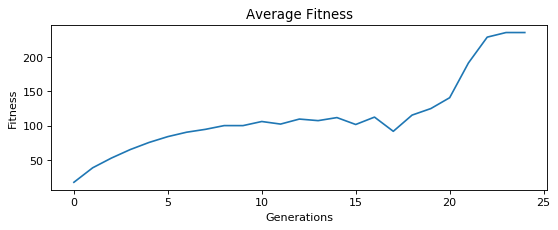

In [12]:
num_populations=1
merge_point=0.5
population_size=7000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (1, 42)
constraint = 2
poly_pop_order_2 = find_prime_polynomial(Poly_Population, 
                                   [Fitness.number_of_consecutive_primes_in_interval,
                                    Fitness.number_of_primes_in_interval,
                                    Fitness.number_of_consecutive_primes],
                                   num_populations=num_populations, merge_point=merge_point, 
                                   population_size=population_size, 
                                   test_interval=test_interval, birth_rate=birth_rate, 
                                   mutation=mutation, coeffs_bound=coeffs_bound,
                                        constraint=constraint)
show_final_polynomials(poly_pop_order_2, test_interval)
show_average_fitness(poly_pop_order_2, "reproduction.pdf")

<h3>Can we do better? Experimenting with parameter manipulations.</h3>

<h4>Increasing the order of the polynomials.</h4>
The simple assumption is that I need to increase number of possible polynomials.

Chromosome: Poly_Population, Amount of populations: 1, Population-size: 7000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.15, Coeffs-bound: (1, 42), Constraint: 3
Surviving polynomial: 
(6.0)x^2 + (6.0)x^1 + (31.0)
On test interval (0, 200) the polynomial produced 135 primes. 
It had a maximum of 29 consecutive primes on the test interval. 
Starting at 0, it had 29 consecutive primes. 
Its fitness score is 193.

Chromosome: Poly_Population, Amount of populations: 1, Population-size: 7000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.15, Coeffs-bound: (1, 42), Constraint: 6
Surviving polynomial: 
(1.0)x^2 + (1.0)x^1 + (41.0)
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



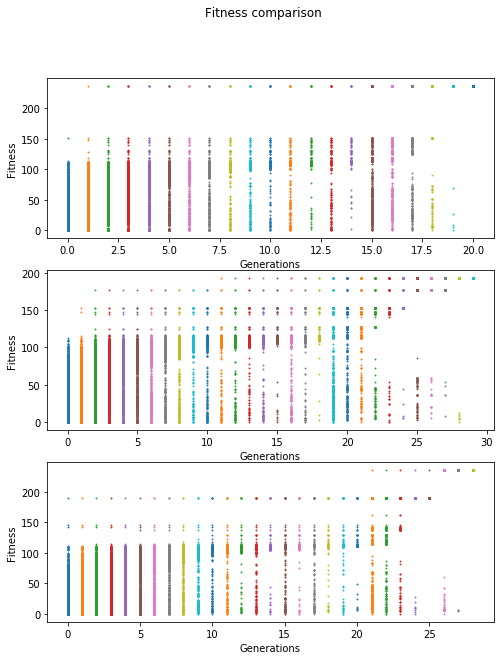

In [6]:
num_populations=1
merge_point=0.5
population_size=7000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.15
coeffs_bound = (1, 42)
constraint = 3
poly_pop_order_3 = find_prime_polynomial(Poly_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(poly_pop_order_3, test_interval)
constraint = 6
poly_pop_order_6 = find_prime_polynomial(Poly_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(poly_pop_order_6, test_interval)
show_scatter_fitness_comparison([poly_pop_order_2, poly_pop_order_3, poly_pop_order_6], "order_comparison.pdf")

Increasing the order reduced diversity, fitness and increased the convergence time. Let's increase the population size of the highest order population next and see what it does.

Chromosome: Poly_Population, Amount of populations: 1, Population-size: 10000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.15, Coeffs-bound: (1, 42), Constraint: 6
Surviving polynomial: 
(6.0)x^2 + (6.0)x^1 + (31.0)
On test interval (0, 200) the polynomial produced 135 primes. 
It had a maximum of 29 consecutive primes on the test interval. 
Starting at 0, it had 29 consecutive primes. 
Its fitness score is 193.



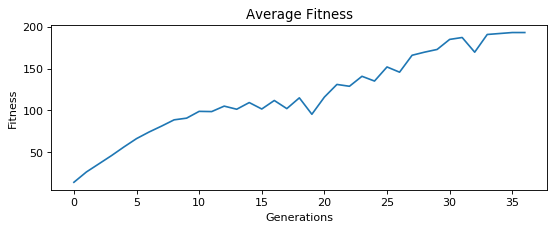

In [7]:
num_populations=1
merge_point=0.5
population_size=10000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.15
coeffs_bound = (1, 42)
constraint = 6
poly_pop_order_6 = find_prime_polynomial(Poly_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(poly_pop_order_6, test_interval)
show_average_fitness(poly_pop_order_6, "pop_plus.pdf")

This improved the result a little bit. To increase the diversity even more I will increase the birth_rate
the mutation rate at the same time.

In [8]:
num_populations=1
merge_point=0.5
population_size=10000
test_interval=(0, 300)
birth_rate=0.9
mutation=0.3
coeffs_bound = (1, 42)
constraint = 6
poly_pop_order_6 = find_prime_polynomial(Poly_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(poly_pop_order_6, test_interval)
show_average_fitness(poly_pop_order_6, "birth_mutation_plus.pdf")

Chromosome: Poly_Population, Amount of populations: 1, Population-size: 10000, 
Test-interval: (0, 300), Birth-rate: 0.9, Mutation-rate: 0.3, Coeffs-bound: (1, 42), Constraint: 6


KeyboardInterrupt: 

At the cost of time, this did indeed increase the performance massively. I will increase the range of possible coefficients next, again to increase the search space.

In [ ]:
num_populations=1
merge_point=0.5
population_size=10000
test_interval=(0, 200)
birth_rate=0.9
mutation=0.3
coeffs_bound = (-70, 71)
constraint = 6
poly_pop_order_6 = find_prime_polynomial(Poly_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(poly_pop_order_6, test_interval)
show_average_fitness(poly_pop_order_6, "search_space_plus.pdf")

Since this increased the search space by a big chunk I will increase in the number of populations. The merge point will be set at 0.5, meaning after the main population has shrunk by 50% it will merge with the other populations. Mind the fact that if the merge-point is set to low, the merge might never occur.

In [ ]:
num_populations=2
merge_point=0.5
population_size=10000
test_interval=(0, 200)
birth_rate=0.9
mutation=0.3
coeffs_bound = (-70, 71)
constraint = 6 
poly_pop_order_6 = find_prime_polynomial(Poly_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(poly_pop_order_6, test_interval)
show_average_fitness(poly_pop_order_6, "pops_plus.pdf")

This increased the performance (except for the converging time) again.

## Tree-Population

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 7000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (1, 42), Constraint: 2
Surviving polynomial: 
((41 + x) + x * x)
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



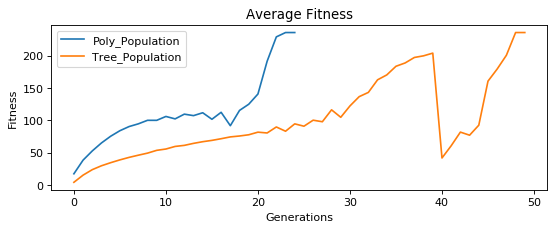

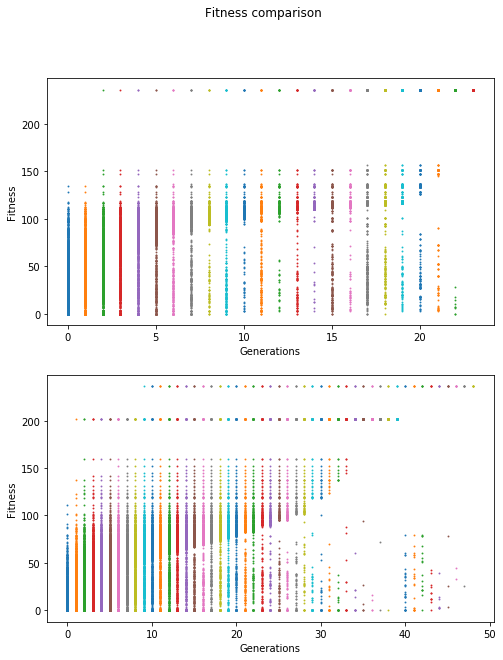

In [31]:
num_populations=1
merge_point=0.5
population_size=7000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (1, 42)
constraint = 2
tree_pop_depth_2 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_depth_2, test_interval)
show_average_fitness_comparison([poly_pop_order_2, tree_pop_depth_2], "tree_poly_comparison.pdf")
show_scatter_fitness_comparison([poly_pop_order_2, tree_pop_depth_2], "tree_poly_2_comparison.pdf")

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 7000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.2, Coeffs-bound: (-41, 42), Constraint: 2.5
Surviving polynomial: 
add(add(add(x, 32), x), add(add(x, -1), add(multiply(x, x), 12)))
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 39 consecutive primes on the test interval. 
Starting at 0, it had 39 consecutive primes. 
Its fitness score is 234.



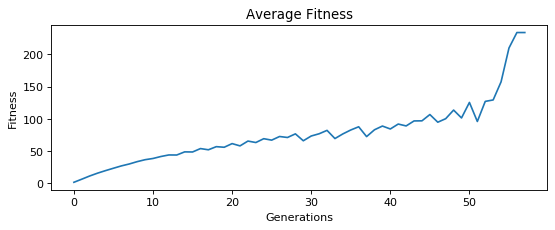

In [8]:
num_populations=1
merge_point=0.5
population_size=7000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.2
coeffs_bound = (-41, 42)
constraint = 2.5
tree_pop_custom = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_custom, test_interval)
show_average_fitness(tree_pop_custom, "custom_tree.pdf")

### Tree-Population, Experimenting with different functions

I will introduce some custom functions to use in the Tree_Population.

In [3]:
def add(x, y):
    return np.add(x, y)


def multiply(x, y):
    return np.multiply(x, y)

def maximum(x, y):
    return np.maximum(x, y)

def minimum(x, y):
    return np.maximum(x, y)

def mod(x, y): # Will return warning whenever y is equivalent to 0. It then returns 0
    return np.mod(x, y)


Chromosome: Tree_Population, Amount of populations: 1, Population-size: 7000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.2, Coeffs-bound: (-41, 42), Constraint: 2


/home/frederik/anaconda3/envs/natCom/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in remainder
  from ipykernel import kernelapp as app


Surviving polynomial: 
minimum(minimum(minimum(maximum(-24, -14), minimum(31, x)), add(multiply(x, 9), mod(minimum(-20, 26), maximum(-8, -22)))), maximum(mod(minimum(-11, x), mod(x, x)), add(multiply(x, x), add(41, x))))
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



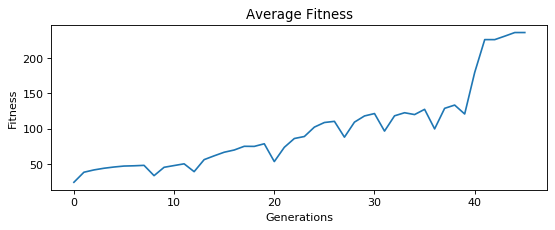

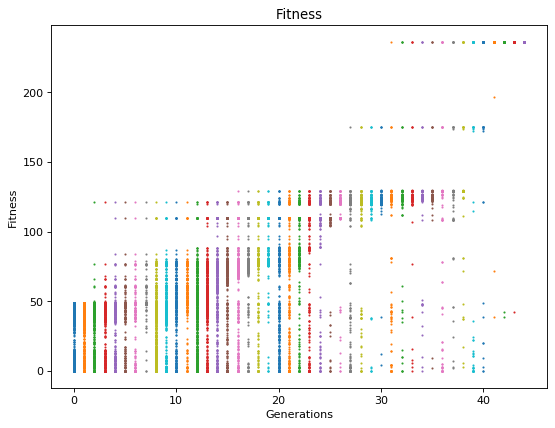

In [6]:
num_populations=1
merge_point=0.5
population_size=7000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.2
coeffs_bound = (-41, 42)
constraint = 2
operator_functions=[maximum, minimum, mod]
tree_pop_exp_custom = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint, operator_functions=operator_functions)
show_final_polynomials(tree_pop_exp_custom, test_interval)
show_average_fitness(tree_pop_exp_custom, "function_exp_2_1_tree.pdf")
show_scatter_fitness(tree_pop_exp_custom, "function_exp_2_2_tree.pdf")

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 300, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.2, Coeffs-bound: (-41, 42), Constraint: 2


/home/frederik/anaconda3/envs/natCom/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in remainder
  from ipykernel import kernelapp as app


Surviving polynomial: 
add(add(-3, x), add(minimum(10, -40), maximum(add(multiply(x, x), maximum(34, x)), -4)))
On test interval (0, 200) the polynomial produced 47 primes. 
It had a maximum of 35 consecutive primes on the test interval. 
Starting at 0, it had 35 consecutive primes. 
Its fitness score is 117.



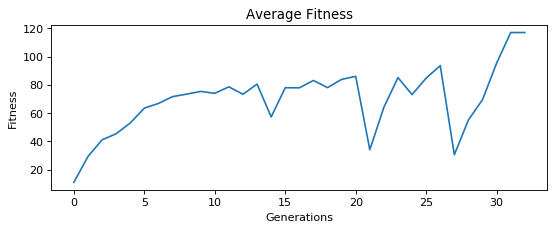

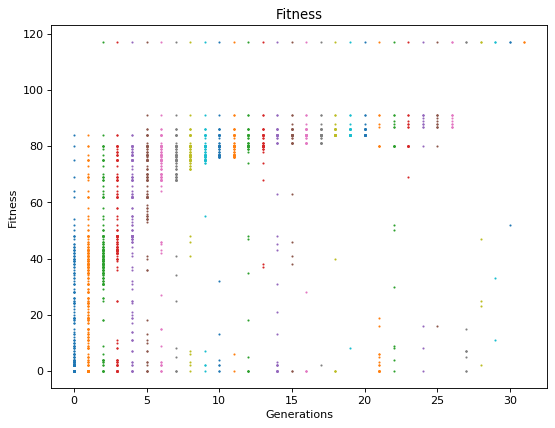

In [7]:
num_populations=1
merge_point=0.5
population_size=7000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.2
coeffs_bound = (-41, 42)
constraint = 2
operator_functions=[add, multiply, maximum, minimum, mod]
tree_pop_exp_custom_2 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint, operator_functions=operator_functions)
show_final_polynomials(tree_pop_exp_custom_2, test_interval)
show_average_fitness(tree_pop_exp_custom_2, "function_exp_tree.pdf")
show_scatter_fitness(tree_pop_exp_custom_2, "function_exp_2_tree.pdf")

What happens if we integrate Simulated Annealing to the initialisation process?

In [11]:
import copy
import math
from Chromosomes import Tree_Terminal

def simulated_annealing(original_polynomial, max_iterations=1000, max_temp=100000, temp_change=0.98):
    if isinstance(original_polynomial, Tree_Chrom):
        current_polynomial = copy.deepcopy(original_polynomial)
        best_polynomial = original_polynomial
        i_polynomial = copy.deepcopy(current_polynomial)
        terminals = i_polynomial.return_terminals()
        for _ in range(max_iterations):
            terminals = np.array([t.go_to_neighbour(50) for t in terminals])
            max_temp = max_temp * temp_change
            i_cost = annealing_cost(i_polynomial)
            current_cost = annealing_cost(current_polynomial)
            prob = math.exp((current_cost-i_cost)/max_temp)
            if i_cost <= current_cost:
                current_polynomial = copy.deepcopy(i_polynomial)
                if i_cost <= annealing_cost(best_polynomial):
                    best_polynomial = copy.deepcopy(i_polynomial)
            elif np.random.choice([True, False], p=[prob, 1-prob]):
                current_polynomial = copy.deepcopy(i_polynomial)
        return best_polynomial
    return original_polynomial

def annealing_cost(polynomial):
    return 1/(1+polynomial.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                       Fitness.number_of_primes_in_interval,
                                                       Fitness.number_of_consecutive_primes]))

poly = Tree_Chrom()
print("On test interval {0} poly produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, poly.num_primes_fitness_in_interval(test_interval),
              poly.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              poly.num_consecutive_primes_fitness(test_interval),
              poly.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                  Fitness.number_of_primes_in_interval,
                                                  Fitness.number_of_consecutive_primes])))
poly = simulated_annealing(poly)
print("On test interval {0} poly produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, poly.num_primes_fitness_in_interval(test_interval),
              poly.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              poly.num_consecutive_primes_fitness(test_interval),
              poly.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                  Fitness.number_of_primes_in_interval,
                                                  Fitness.number_of_consecutive_primes])))

On test interval (0, 200) poly produced 0 primes. 
It had a maximum of 0 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 0.

On test interval (0, 200) poly produced 26 primes. 
It had a maximum of 1 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 27.



In [ ]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.2
coeffs_bound = (-41, 42)
constraint = 2
tree_pop_exp_custom_2 = find_prime_polynomial(Tree_SimAnnealing_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_exp_custom_2, test_interval)
show_average_fitness(tree_pop_exp_custom_2, ".pdf")
show_scatter_fitness(tree_pop_exp_custom_2, "function_exp_2_tree.pdf")